# RnB Soul Lyrics

In [1]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np

import matplotlib as plt

In [2]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
my_rapid_api_key = os.getenv("RAPID_API_KEY")

In [3]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [4]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [5]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'SOUL_RNB'
limit_songs = 50
country = 'US'

querystring = {"country_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

In [6]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

The number of songs retrieved is : 50


,Track Name,Artists
TrackIDs,,
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic"
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d
510700753,Save Your Tears,The Weeknd
158832749,Idfc,Blackbear
582361274,I Hate U,SZA


In [7]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

<AxesSubplot:title={'center':'RNB Artists on Top Chart'}, xlabel='Artists'>

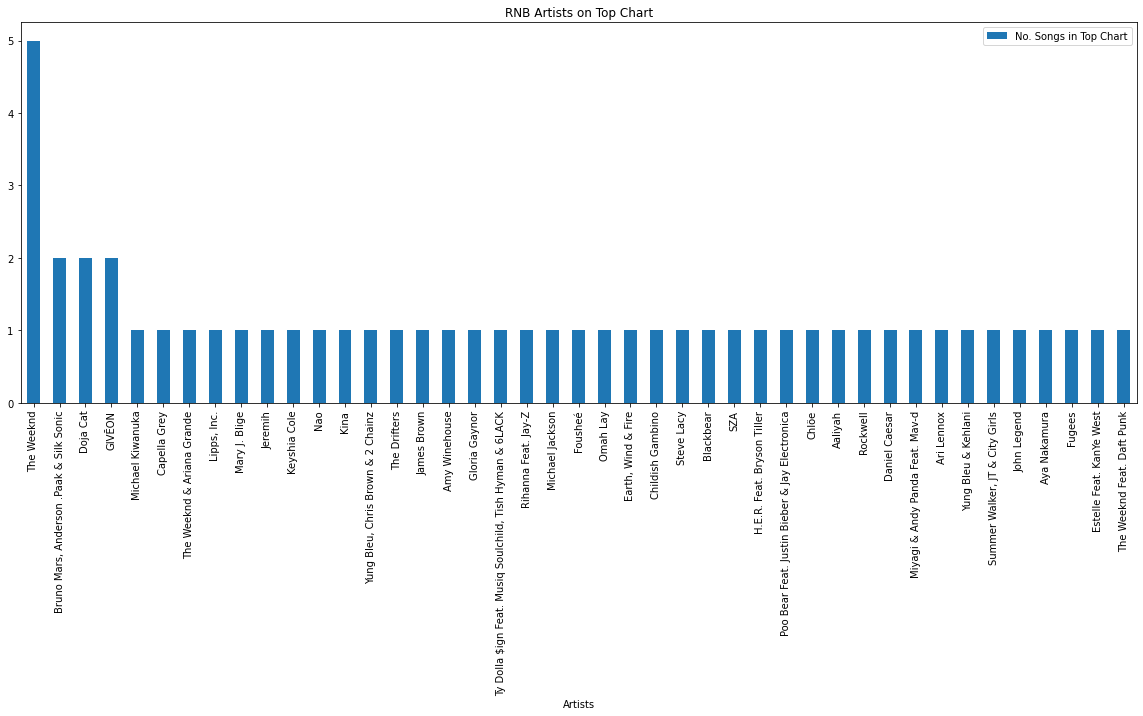

In [8]:
# Visualize data
artists_df.plot.bar(figsize =(20, 7), title = 'RNB Artists on Top Chart')

In [9]:
# Retrieve Lyrics for all TrackIDs
track_ids 

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [10]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d,Для тебя найду добро и верну ему пульс Вновь к...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."


In [11]:
lyrics_df

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d,Для тебя найду добро и верну ему пульс Вновь к...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo..."
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...
560275260,Leave The Door Open,"Bruno Mars, Anderson .Paak & Silk Sonic","Said baby, said baby, said baby What you doin..."


In [12]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [
        '591295396', '585090484', '437075280', '46881861', '541883345'
    ]
)
new_lyrics_df

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo..."
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...
560275260,Leave The Door Open,"Bruno Mars, Anderson .Paak & Silk Sonic","Said baby, said baby, said baby What you doin..."
502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...


# Tokenizer
In this section, we use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'doo', ' ah,', 'ca', 'Doo', 'doo', 'nt', 'ay', 'wan', 'wo', 'ta', 'oh', 'ohoh', 'cause', 'Romano', 'Hitmaka', 'fuckin', 'fuck', 'shit', 'nigga', 'niggas', 'bitch', 'motherfucker', 'Motherfucker', 'dick']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [16]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin...","[sick, yall, contradicting, bored, come, feel,..."
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."


In [17]:
new_lyrics_df.reset_index(inplace=True)
new_lyrics_df

,index,Track Name,Artists,Lyrics,Tokens
0,587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
1,510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
2,158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
3,582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin...","[sick, yall, contradicting, bored, come, feel,..."
4,579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
5,433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."
6,412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,..."
7,503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,..."
8,560275260,Leave The Door Open,"Bruno Mars, Anderson .Paak & Silk Sonic","Said baby, said baby, said baby What you doin...","[said, baby, said, baby, said, baby, got, plan..."
9,502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah..."


In [18]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
0,"Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
1,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
2,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
3,"I be so sick of you niggas, y'all contradictin...","[sick, yall, contradicting, bored, come, feel,..."
4,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
5,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."
6,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,..."
7,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,..."
8,"Said baby, said baby, said baby What you doin...","[said, baby, said, baby, said, baby, got, plan..."
9,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah..."


# Calculating VADER Sentiment Score for LYRICS

As you know the `compound` score could be used to get a normalized score for a sentiment. We create a function called `get_sentiment(score)` that will return a normalized value of sentiment for the `score` parameter based on the rules. This function should return `1` for positive sentiment, `-1` for negative sentiment, and `0` for neutral sentiment.

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/moniqueferguson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [22]:
# Sentiment scores dictionaries
lyrics_sent = {
    "lyrics_compound": [],
    "lyrics_pos": [],
    "lyrics_neu": [],
    "lyrics_neg": [],
    "lyrics_sent": [],
}

# Get sentiment for the lyrics
for index, row in new_lyrics_df.iterrows():
    try:
        # Sentiment scoring with VADER
        lyrics_sentiment = analyzer.polarity_scores(row["Lyrics"])
        lyrics_sent["lyrics_compound"].append(lyrics_sentiment["compound"])
        lyrics_sent["lyrics_pos"].append(lyrics_sentiment["pos"])
        lyrics_sent["lyrics_neu"].append(lyrics_sentiment["neu"])
        lyrics_sent["lyrics_neg"].append(lyrics_sentiment["neg"])
        lyrics_sent["lyrics_sent"].append(get_sentiment(lyrics_sentiment["compound"]))

    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
lyrics_sentiment_df = pd.DataFrame(lyrics_sent)

# new_lyrics_df = new_lyrics_df.join(lyrics_sentiment_df)

# new_lyrics_df.head()
result_lyrics_df = pd.concat([new_lyrics_df, lyrics_sentiment_df], axis=1)
result_lyrics_df

,index,Track Name,Artists,Lyrics,Tokens,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent
0,587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g...",0.4019,0.091,0.826,0.083,1
1,510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ...",0.9511,0.212,0.612,0.176,1
2,158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev...",-0.9858,0.137,0.615,0.247,-1
3,582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin...","[sick, yall, contradicting, bored, come, feel,...",-0.9813,0.130,0.687,0.183,-1
4,579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t...",0.9892,0.154,0.808,0.038,1
5,433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv...",-0.9631,0.077,0.799,0.124,-1
6,412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,...",-0.6333,0.078,0.812,0.110,-1
7,503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,...",-0.4434,0.069,0.836,0.095,-1
8,560275260,Leave The Door Open,"Bruno Mars, Anderson .Paak & Silk Sonic","Said baby, said baby, said baby What you doin...","[said, baby, said, baby, said, baby, got, plan...",0.9944,0.141,0.815,0.043,1
9,502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah...",0.9959,0.208,0.736,0.056,1


### Analyzing Sentiments Results

The sentiment of the lyrics


<AxesSubplot:title={'center':'RnB Lyrics Sentiment'}>

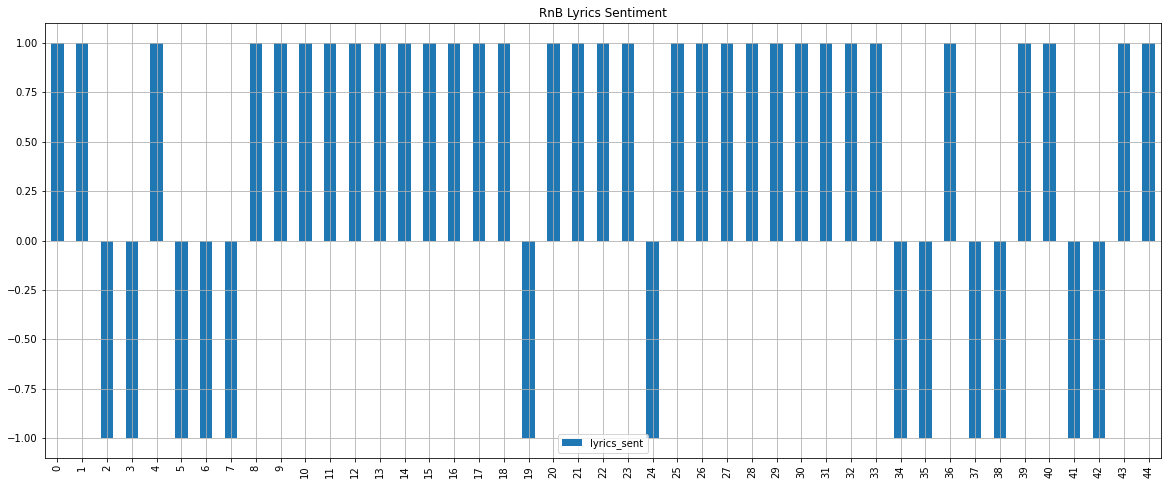

In [23]:
result_lyrics_df.plot(
    y=["lyrics_sent"],
    kind="bar",
    title="RnB Lyrics Sentiment",
    figsize=(20, 8),
    grid=True
)


In [24]:
result_lyrics_df.describe()

,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.421809,0.140444,0.762156,0.097400,0.422222
std,0.857034,0.061576,0.086490,0.066177,0.916736
min,-0.999600,0.032000,0.565000,0.000000,-1.000000
25%,-0.633300,0.086000,0.709000,0.039000,-1.000000
50%,0.963500,0.141000,0.758000,0.094000,1.000000
75%,0.992600,0.180000,0.826000,0.136000,1.000000
max,0.999000,0.268000,0.956000,0.263000,1.000000


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.


In [25]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(80)))

{('feel', 'coming'): 61, ('coming', 'babe'): 32, ('take', 'funkytown'): 28, ('coming', 'feel'): 28, ('babe', 'feel'): 28, ('feel', 'like'): 27, ('reason', 'though'): 23, ('funkytown', 'take'): 22, ('save', 'tear'): 21, ('tear', 'another'): 21, ('ah', 'ah'): 20, ('gon', 'na'): 19, ('alright', 'alright'): 19, ('like', 'like'): 18, ('another', 'day'): 17, ('run', 'away'): 16, ('let', 'groove'): 16, ('always', 'feel'): 15, ('beautiful', 'lie'): 15, ('let', 'get'): 15, ('make', 'feel'): 14, ('take', 'breath'): 14, ('like', 'somebody'): 14, ('american', 'boy'): 14, ('go', 'back'): 14, ('would', 'die'): 14, ('yeah', 'ah'): 13, ('ima', 'leave'): 13, ('ah', 'yeah'): 13, ('could', 'could'): 12, ('leave', 'door'): 12, ('door', 'open'): 12, ('f', 'real'): 12, ('ex', 'reason'): 12, ('give', 'give'): 12, ('talk', 'talk'): 12, ('umbrella', 'ella'): 12, ('ella', 'ella'): 12, ('hard', 'face'): 11, ('face', 'reality'): 11, ('take', 'take'): 11, ('go', 'go'): 11, ('though', 'reason'): 11, ('billie', 'jea

In [27]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words from hip hop rap lyrics
lyrics_top_10 = token_count(lyrics_processed)
lyrics_top_10

[('like', 183),
 ('feel', 143),
 ('know', 115),
 ('baby', 103),
 ('take', 101),
 ('yeah', 100),
 ('got', 94),
 ('get', 92),
 ('love', 91),
 ('go', 81)]

# Word Clouds
In this section, I generate word clouds hip hop rap lyrics

In [29]:
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

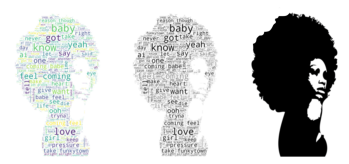

In [30]:
# Generate the RnB lyrics word cloud
lyrics_words_joined = ' '.join(lyrics_processed)

rnb_coloring = np.array(Image.open("Images/rnbwc.png"))

wccc = WordCloud(background_color="white", max_words=2000, mask=rnb_coloring, max_font_size=120, random_state=42, width=2000, height=1200)

# generate word cloud
wccc.generate(lyrics_words_joined)

# create coloring from image
image_colors = ImageColorGenerator(rnb_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wccc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wccc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(rnb_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()


In [31]:
# Save image as png
# wccc.to_file("Images/rnbart.png")

# Named Entity Recognition
In this section, we build a named entity recognition model for the hip hop lyrics, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [34]:
# Run the NER processor on all of the text
rnb_ner = nlp(lyrics_text)

# Add a title to the document
rnb_ner.user_data['title'] = 'R&B Soul NER'

In [35]:
# Render the visualization
displacy.render(rnb_ner, style='ent')

In [36]:
# List all Entities
for ent in rnb_ner.ents:
    print(ent.text, ent.label_)

35 CARDINAL
45 thousand CARDINAL
Tiffany's ORG
Chuck E. Cheese PERSON
UFC ORG
Screamin PERSON
Hercules PERSON
Hercules GPE
Hercules GPE
Smokin PERSON
Benzo ORG
One CARDINAL
one CARDINAL
second ORDINAL
another day DATE
another day DATE
another day DATE
another day DATE
another day DATE
another day DATE
Damn WORK_OF_ART
Miami GPE
First ORDINAL
Talkin GPE
all night TIME
Love WORK_OF_ART
Reality PERSON
just hours ago TIME
Wacko WORK_OF_ART
Sin City's GPE
tonight TIME
Purple Haze PERSON
Girl PRODUCT
tonight TIME
tonight TIME
Don Dada PERSON
Tryna PERSON
Paris Plan ORG
No Final Fantasy ORG
one CARDINAL
Booty PERSON
three CARDINAL
Cartier PERSON
Laffy Taffy PERSON
Booty PERSON
Floss ORG
Floss ORG
Laffy Taffy PERSON
Booty PERSON
Floss ORG
East Coast LOC
West Coast LOC
South LOC
East Coast LOC
West Coast LOC
South LOC
East Coast LOC
West Coast LOC
South LOC
East Coast LOC
West Coast LOC
these days DATE
Japan GPE
Aaliyah (Aaliyah) Give ORG
9 CARDINAL
the Twilight Zone EVENT
Psycho GPE
IRS ORG
Ho

In [37]:
# result_lyrics_df.to_csv('rnb_lyrics.csv', index=False)

# Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

- The keys should be all of the words in the corpus
- The values should be a list of the words that follow the keys

In [38]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
#     for t in text:
#         words = t.split(' ')
#         print(words[0])
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [39]:
# Create the dictionary for lyrics, take a look at it
# lyrics_dict = new_lyrics_df['Lyrics_str'].apply(markov_chain)

lyrics_dict = markov_chain(lyrics_text)
lyrics_dict

{'Wait': ['a'],
 'a': ['minute,',
  'jam',
  'new',
  'crowded',
  'second',
  'fool',
  'fool',
  'fool',
  'fool',
  'dream',
  'dream',
  'story',
  'trip',
  'wish,',
  'requirement',
  'requirement',
  'miracle',
  'cycle',
  'man',
  'touch,',
  'robe',
  'newborn)',
  'rare',
  'hoe',
  "motherfuckin'",
  'feather,',
  'one',
  'million',
  'piece',
  'couple',
  'Cartier,',
  'piece',
  'couple',
  'piece',
  'couple',
  'piece',
  'couple',
  'piece',
  'couple',
  'dream?',
  'little',
  'mess',
  'dream?',
  'bit',
  'bit',
  'lot',
  'tough',
  'candy',
  'lot',
  'tough',
  'lot',
  'tough',
  'relapse',
  'reason',
  'reason',
  'bitch',
  'reason',
  'reason',
  'reason',
  'reason',
  'reason,',
  'bitch',
  'bag',
  'bitch',
  'bitch',
  'check',
  'figure',
  'real',
  'reason',
  'reason',
  'reason',
  'reason',
  'reason',
  'reason',
  'gun',
  'rhyme',
  'sip',
  'state',
  'drag',
  'letter',
  'game',
  'lot,',
  'pound',
  'trip,',
  'trip,',
  'Cafe',
  'trip

# Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:

- The dictionary you just created
- The number of words you want generated

In [40]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [55]:
line_1 = generate_sentence(lyrics_dict)
line_1

"Notes (yeah) She says I always told me, somebody  Hey, there's no privacy I."

In [57]:
line_2 = generate_sentence(lyrics_dict)
line_2

"In this dance on the deep end I do to death, I'm the one, oh."

In [58]:
line_3 = generate_sentence(lyrics_dict)
line_3

'"don\'t mind, but your friend Took an emotional wreck right in And you a simple.'

In [59]:
line_4 = generate_sentence(lyrics_dict)
line_4

"Friend, no, hee-hee-hee) Hoo  In this (pressure) Takes a hundred times I'll show you."

In [60]:
chorus_1 = generate_sentence(lyrics_dict)
chorus_1

"Twist it like that b- 'fore I feel it coming, babe Before you friend you."

In [61]:
chorus_2 = generate_sentence(lyrics_dict)
chorus_2

"Yeah, uh  We got my chest Ah, ah, yeah You don't think of you,."

In [62]:
chorus_3 = generate_sentence(lyrics_dict)
chorus_3

"Type So just wanna give it coming, I See 'em (both of me close your."

In [63]:
chorus_4 = generate_sentence(lyrics_dict)
chorus_4

'Soft  In this groove, light up then you my chest Ah, ah, yeah Beautiful.'

In [64]:
line_5 = generate_sentence(lyrics_dict)
line_5

"Please, allow me like I was wrong (I know you ain't just met this a-."

In [65]:
line_6 = generate_sentence(lyrics_dict)
line_6

'Through) woo! La-la-la, la-la-la-la (I gotta talk that you touch and what you feel it.'

In [66]:
line_7 = generate_sentence(lyrics_dict)
line_7

'Though? You his pappy He go off this a- up on speaker when you are.'

In [67]:
line_8 = generate_sentence(lyrics_dict)
line_8

'Asleep, uh Swear she belong to love to a dream?  Oh, I wanna give,.'

In [68]:
line_9 = generate_sentence(lyrics_dict)
line_9

"You?) (How could have it, don't that would do to only call you and for."

In [69]:
line_10 = generate_sentence(lyrics_dict)
line_10

'Worth it And no, no fit understand the deep end I really need your favourite.'

# Create a hit song

In [91]:
# Pring the hit rnb song
print('The RnB Song')
print('_____________________________')
print('Verse 1')
print('_____________________________')
print(line_1)
print(line_2)
print(line_3)
print(line_4)
print('_____________________________')
print('Chorus')
print('_____________________________')
print(chorus_1)
print(chorus_2)
print(chorus_3)
print(chorus_4)
print('_____________________________')
print('Verse 2')
print('_____________________________')
print(line_5)
print(line_6)
print(line_7)
print(line_8)
print('_____________________________')
print('Bridge')
print('_____________________________')
print(line_9)
print(line_10)
print('_____________________________')
print('Chorus (Repeat X 3)')
print('_____________________________')
print(chorus_1)
print(chorus_2)
print(chorus_3)
print(chorus_4)

The RnB Song
_____________________________
Verse 1
_____________________________
Notes (yeah) She says I always told me, somebody  Hey, there's no privacy I.
In this dance on the deep end I do to death, I'm the one, oh.
"don't mind, but your friend Took an emotional wreck right in And you a simple.
Friend, no, hee-hee-hee) Hoo  In this (pressure) Takes a hundred times I'll show you.
_____________________________
Chorus
_____________________________
Twist it like that b- 'fore I feel it coming, babe Before you friend you.
Yeah, uh  We got my chest Ah, ah, yeah You don't think of you,.
Type So just wanna give it coming, I See 'em (both of me close your.
Soft  In this groove, light up then you my chest Ah, ah, yeah Beautiful.
_____________________________
Verse 2
_____________________________
Please, allow me like I was wrong (I know you ain't just met this a-.
Through) woo! La-la-la, la-la-la-la (I gotta talk that you touch and what you feel it.
Though? You his pappy He go off this a- up

In [95]:
# Export a text file with the results
with open('rnbsong.txt', 'w') as out:
    out.write('The RnB Song' '\n')
    out.write('\n')
    out.write('\n')
    out.write('\n')
    out.write('Verse 1')
    out.write('\n')
    out.write('\n')
    out.write(line_1)
    out.write('\n')
    out.write(line_2)
    out.write('\n')
    out.write(line_3)
    out.write('\n')
    out.write(line_4)
    out.write('\n')
    out.write('\n')
    out.write('Chorus')
    out.write('\n')
    out.write('\n')
    out.write(chorus_1)
    out.write('\n')
    out.write(chorus_2)
    out.write('\n')
    out.write(chorus_3)
    out.write('\n')
    out.write(chorus_4)
    out.write('\n')
    out.write('\n')
    out.write('Verse 2')
    out.write('\n')
    out.write('\n')
    out.write(line_5)
    out.write('\n')
    out.write(line_6)
    out.write('\n')
    out.write(line_7)
    out.write('\n')
    out.write(line_8)
    out.write('\n')
    out.write('\n')
    out.write('Chorus')
    out.write('\n')
    out.write('\n')
    out.write(chorus_1)
    out.write('\n')
    out.write(chorus_2)
    out.write('\n')
    out.write(chorus_3)
    out.write('\n')
    out.write(chorus_4)
    out.write('\n')
    out.write('\n')
    out.write('Bridge')
    out.write('\n')
    out.write('\n')
    out.write(line_9)
    out.write('\n')
    out.write(line_10)
    out.write('\n')
    out.write('\n')
    out.write('\n')
    out.write('Chorus Repeat X 3')


In [53]:
# text = ' '.join(result_lyrics_df['Lyrics'].tolist())

# file = open('rnb_text.txt', 'w')
# file.write(text)